## Prerequiste

### Model preparation from Open Model Zoo (OMZ)

In [7]:
# !omz_downloader --name resnet-50-tf
!mo --input_model ~/public/resnet-50-tf/resnet_v1-50.pb --input map/TensorArrayStack/TensorArrayGatherV3 --output resnet_model/Relu_48 --output_dir ~/public/resnet-50-tf/backbone
!mo --input_model ~/public/resnet-50-tf/resnet_v1-50.pb --input resnet_model/Relu_48 --output_dir ~/public/resnet-50-tf/head

Check for a new version of Intel(R) Distribution of OpenVINO(TM) toolkit here https://software.intel.com/content/www/us/en/develop/tools/openvino-toolkit/download.html?cid=other&source=prod&campid=ww_2023_bu_IOTG_OpenVINO-2022-3&content=upg_all&medium=organic or on https://github.com/openvinotoolkit/openvino
[ INFO ] The model was converted to IR v11, the latest model format that corresponds to the source DL framework input/output format. While IR v11 is backwards compatible with OpenVINO Inference Engine API v1.0, please use API v2.0 (as of 2022.1) to take advantage of the latest improvements in IR v11.
Find more information about API v2.0 and IR v11 at https://docs.openvino.ai/latest/openvino_2_0_transition_guide.html
[ SUCCESS ] Generated IR version 11 model.
[ SUCCESS ] XML file: /home/wonju/public/resnet-50-tf/backbone/resnet_v1-50.xml
[ SUCCESS ] BIN file: /home/wonju/public/resnet-50-tf/backbone/resnet_v1-50.bin
Check for a new version of Intel(R) Distribution of OpenVINO(TM) to

### Data preparation from ImageNet-1K (ILSVRC2012)

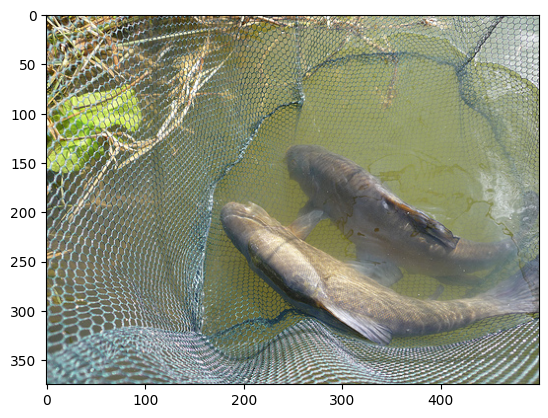

In [2]:
import cv2
import matplotlib.pyplot as plt

# The MobileNet model expects images in RGB format.
image = cv2.cvtColor(cv2.imread(filename="./ILSVRC2012_val_00000293.JPEG"), code=cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

## Obtain Explanation through ReciproCAM

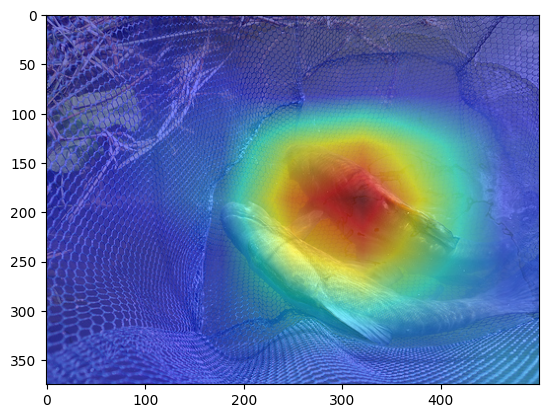

In [3]:
import numpy as np

# The MobileNet model expects images in RGB format.
image = cv2.cvtColor(cv2.imread(filename="./ILSVRC2012_val_00000293.JPEG"), code=cv2.COLOR_BGR2RGB)

# plt.imshow(image)
# plt.show()

import os.path as osp
from openvino.runtime import Core

from datumaro.components.algorithms.recipro_cam import ReciproCAM

backbone_xml_path = osp.expanduser("~/public/resnet-50-tf/backbone/resnet_v1-50.xml")
head_xml_path = osp.expanduser("~/public/resnet-50-tf/head/resnet_v1-50.xml")

ie = Core()
backbone = ie.read_model(model=backbone_xml_path)
head = ie.read_model(model=head_xml_path)

cam = ReciproCAM(backbone, head, dsize=(224, 224), use_gaussian=False)

# Obtain CAM result
cam_result = next(cam.apply(image, 0))

# Apply a colormap to the normalized saliency map
colored_cam = cv2.applyColorMap(cam_result, cv2.COLORMAP_JET)

# Create a blank canvas of the same size as the original image
canvas = np.copy(image)

# Overlay the resized image onto the canvas using alpha blending
alpha = 0.5  # Adjust the transparency of the overlay
overlay = cv2.addWeighted(colored_cam, alpha, canvas, 1 - alpha, 0)

plt.imshow(overlay, cmap="hot")
plt.show()